In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import flowermd
import gsd.hoomd
import matplotlib as plt

In [3]:
#for use when using signac-flow
num_pps = 30
density_sim = 1.35
chain_lengths = 20 #this defines how many monomers are in a given chain
num_timesteps = 10000
gsd_freq = 100
log_freq = 100

In [4]:
from flowermd.library import PPS
molecules = PPS(num_mols = num_pps, lengths=chain_lengths)

In [5]:
from flowermd.base import Pack
system = Pack(molecules=molecules, density=density_sim, packing_expand_factor=5)

In [6]:
from flowermd.library import OPLS_AA_PPS

system.apply_forcefield(r_cut= 2.5, force_field=OPLS_AA_PPS(), auto_scale=True, scale_charges=True)

/home/danirojas/miniconda3/envs/flowermd/lib/python3.9/site-packages/gmso/core/topology.py:818: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_scales[index][scaling_interaction_idxes[interaction]] = value
/home/danirojas/miniconda3/envs/flowermd/lib/python3.9/site-packages/gmso/core/topology.py:818: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  all_scales[index][scaling_interaction_idxes[interaction]] = value


In [7]:
hoomd_forces = system.hoomd_forcefield

In [8]:
lj_force = hoomd_forces[3]

In [9]:
from flowermd.base import Simulation

sim = Simulation.from_system(system=system, gsd_write_freq=gsd_freq, log_write_freq=log_freq)

Initializing simulation state from a gsd.hoomd.Frame.


In [10]:
sim.run_update_volume(n_steps=1000, period=1, kT=1, tau_kt=1, final_box_lengths=system.target_box)

*Warning*: charge.pppm: system is not neutral and unscreened interactions are calculated, the net charge is 4.29153e-05
*Warning*: charge.pppm: RMS error of 0.982093 is probably too high! 0.981953 0.982093


Step 100 of 1000; TPS: 43.14; ETA: 0.3 minutes
Step 200 of 1000; TPS: 46.04; ETA: 0.3 minutes
Step 300 of 1000; TPS: 46.21; ETA: 0.3 minutes
Step 400 of 1000; TPS: 45.51; ETA: 0.2 minutes
Step 500 of 1000; TPS: 44.13; ETA: 0.2 minutes
Step 600 of 1000; TPS: 42.36; ETA: 0.2 minutes
Step 700 of 1000; TPS: 39.92; ETA: 0.1 minutes
Step 800 of 1000; TPS: 36.37; ETA: 0.1 minutes
Step 900 of 1000; TPS: 31.88; ETA: 0.1 minutes
Step 1000 of 1000; TPS: 25.51; ETA: 0.0 minutes


In [11]:
import hoomd
for writer in sim.operations.writers:
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

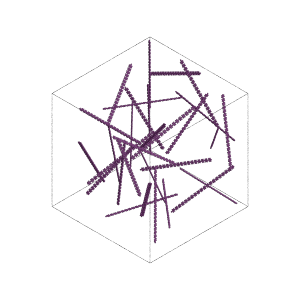

In [12]:
from cmeutils.visualize import FresnelGSD

sim_visualizer = FresnelGSD(gsd_file="trajectory.gsd", frame=0, view_axis=(1, 1, 1))
sim_visualizer.view()

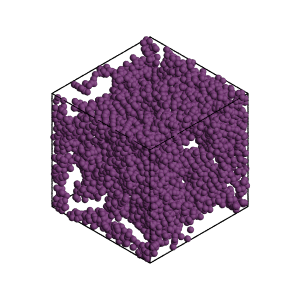

In [13]:
sim_visualizer.frame = -1
sim_visualizer.view()

In [14]:
logger = hoomd.logging.Logger(categories=['scalar', 'string'])
logger.add(sim, quantities =['timestep', 'tps'])                           

In [15]:
file = open('log.txt', mode='w', newline='\n')

In [16]:
table_file = hoomd.write.Table(output=file,
                               trigger=hoomd.trigger.Periodic(period=500),
                               logger=logger)
sim.operations.writers.append(table_file)

In [17]:
#adjust n_steps depending on use
#job.sp."whatever parameter from flow template's init.py"
sim.run_NVT(n_steps= num_timesteps, kT=1.0, tau_kt=0.01)

Step 99 of 10000; TPS: 8.47; ETA: 19.5 minutes
Step 199 of 10000; TPS: 8.78; ETA: 18.6 minutes
Step 299 of 10000; TPS: 8.91; ETA: 18.1 minutes
Step 399 of 10000; TPS: 9.05; ETA: 17.7 minutes
Step 499 of 10000; TPS: 9.05; ETA: 17.5 minutes
Step 599 of 10000; TPS: 9.14; ETA: 17.1 minutes
Step 699 of 10000; TPS: 9.19; ETA: 16.9 minutes
Step 799 of 10000; TPS: 9.26; ETA: 16.6 minutes
Step 899 of 10000; TPS: 9.31; ETA: 16.3 minutes
Step 999 of 10000; TPS: 9.35; ETA: 16.0 minutes
Step 1099 of 10000; TPS: 9.38; ETA: 15.8 minutes
Step 1199 of 10000; TPS: 9.41; ETA: 15.6 minutes
Step 1299 of 10000; TPS: 9.45; ETA: 15.3 minutes
Step 1399 of 10000; TPS: 9.48; ETA: 15.1 minutes
Step 1499 of 10000; TPS: 9.5; ETA: 14.9 minutes
Step 1599 of 10000; TPS: 9.53; ETA: 14.7 minutes
Step 1699 of 10000; TPS: 9.55; ETA: 14.5 minutes
Step 1799 of 10000; TPS: 9.58; ETA: 14.3 minutes
Step 1899 of 10000; TPS: 9.6; ETA: 14.1 minutes
Step 1999 of 10000; TPS: 9.62; ETA: 13.9 minutes
Step 2099 of 10000; TPS: 9.64; ET

In [18]:
!cat log.txt

flowermd.base.simulation.Simulation.timestep flowermd.base.simulation.Simulation.tps
                    1500                                     9.05410                
                    2000                                     9.35073                
                    2500                                     9.49907                
                    3000                                     9.61928                
                    3500                                     9.71310                
                    4000                                     9.80351                
                    4500                                     9.88630                
                    5000                                     9.95698                
                    5500                                    10.03627                
                    6000                                    10.10846                
                    6500                                    10.18

In [19]:
import numpy as np
numbers = np.loadtxt('log.txt', usecols=(1), skiprows=(1))
average_tps = np.mean(numbers)
print("Average TPS for n =",num_pps, "is", average_tps)

Average TPS for n = 30 is 10.0956155


In [20]:
for writer in sim.operations.writers:
    if isinstance(writer, hoomd.write.GSD):
        writer.flush()

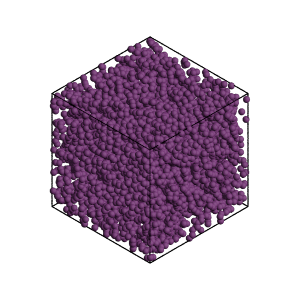

In [21]:
sim_visualizer.frame=-1
sim_visualizer.view()

In [22]:
with gsd.hoomd.open("trajectory.gsd") as traj:
    frame = traj[0] # traj is a list of snapshots, so you can access them using regular indexing
    particle_types = frame.particles.types
    print(particle_types)

['ca', 'ha', 'hs', 's', 'sh']
